# Install & Download Library

In [ ]:
import keras
print(keras.__version__)

2.12.0


In [ ]:
pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [ ]:
from PyEMD import EMD

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch import sigmoid,tanh
import torch.optim as optim

torch.manual_seed(0)
torch.set_default_dtype(torch.float32)
device = torch.device("cpu")

In [ ]:
from scipy.io import loadmat

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os 
import scipy
import math
import keras
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy import signal

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import silhouette_score

# Download Data

In [ ]:
dat_1 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1730.csv')
dat_2 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1750.csv')
dat_3 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1772.csv')
dat_4 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_DE_1797.csv')
dat_5 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1730.csv')
dat_6 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1750.csv')
dat_7 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1772.csv')
dat_8 = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/wav_new_features_FE_1797.csv')

In [ ]:
dat_1_ims=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing1.csv')
# dat_2=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing2.csv')
# dat_3=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing3.csv')
# dat_4=pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_bearing4.csv')
# ims = pd.read_csv('/content/gdrive/MyDrive/IMS/Processed Data/ims_wav_1st_test_gabungan.csv')

In [ ]:
dat_1=dat_1.loc[(dat_1.fault=='normal') | (dat_1.fault=='suspect')]

In [ ]:
dat_1.fault.unique()

array(['suspect', 'normal'], dtype=object)

# Supervised Learning

 ## Training

### Classification

In [ ]:
class JANet(nn.Module):
    def __init__(self, inputs, cells, num_outputs, num_timesteps, output_activation=None):
        super(JANet, self).__init__()
        
        self.inputs = inputs
        self.cells = cells
        self.classes = num_outputs
        self.num_timesteps = num_timesteps
        self.output_activation = output_activation
        
        kernel_data = torch.zeros(inputs, 2 * cells, dtype=torch.get_default_dtype())
        kernel_data = torch.nn.init.xavier_uniform_(kernel_data)
        self.kernel = nn.Parameter(kernel_data)
        
        recurrent_kernel_data = torch.zeros(cells, 2 * cells, dtype=torch.get_default_dtype())
        recurrent_kernel_data = torch.nn.init.xavier_uniform_(recurrent_kernel_data)
        self.recurrent_kernel = nn.Parameter(recurrent_kernel_data)
        
        recurrent_bias = np.zeros(2 * cells)
        # chrono initializer
        recurrent_bias[:cells] = np.log(np.random.uniform(1., self.num_timesteps - 1, size=cells))
        recurrent_bias = recurrent_bias.astype('float32')
        self.recurrent_bias = nn.Parameter(torch.from_numpy(recurrent_bias))
        
        self.output_dense = nn.Linear(cells, num_outputs)
        
    def forward(self, inputs):
        h_state = torch.zeros(inputs.size(0), self.cells, dtype=torch.get_default_dtype()).to(device)
        c_state = torch.zeros(inputs.size(0), self.cells, dtype=torch.get_default_dtype()).to(device)
        
        num_timesteps = inputs.size(1)
        
        for t in range(num_timesteps):
            ip = inputs[:, t, :]
            
            z = torch.mm(ip, self.kernel)
            z += torch.mm(h_state, self.recurrent_kernel) + self.recurrent_bias
            
            z0 = z[:, :self.cells]
            z1 = z[:, self.cells: self.cells * 2]
            
            f = sigmoid(z0)
            c = f * c_state + (1. - f) * tanh(z1)
            
            h = c
            
            h_state = h
            c_state = c
        
        preds = self.output_dense(h_state)
        
        if self.output_activation is not None:
            preds = self.output_activation(preds)
        
        return preds

In [ ]:
# we define some constants 
import os
import shutil
if not os.path.exists('weights'):
    os.makedirs('weights/')

# Parameters taken from https://arxiv.org/abs/1804.04849
TIME_STEPS = 50
NUM_UNITS = 128
LEARNING_RATE = 0.001
STEPS_PER_EPOCH = 100
NUM_EPOCHS = 10
BATCH_SIZE = 64


CHECKPOINTS_DIR = 'checkpoints_addition_pytorch/'
CHECKPOINT_PATH = CHECKPOINTS_DIR + 'addition_janet.pkl'

if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)

In [ ]:
y=dat_1['0.1'].replace({
    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.007-OuterRace12.mat' : 4,
    '0.007-OuterRace3.mat' : 5,
    '0.007-OuterRace6.mat' : 6,
    '0.014-OuterRace6.mat' : 7,
    '0.021-OuterRace12.mat' : 8,
    '0.021-OuterRace3.mat' : 9,
    '0.021-OuterRace6.mat' : 10,
    '0.007-Ball.mat': 11,
    '0.014-Ball.mat' : 12,
    '0.021-Ball.mat' : 13,
})

In [ ]:
X=dat_1.drop(['Unnamed: 0','0.1'],axis=1)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,5.113594,3.398368,0.066335,0.188110,0.000363,0.000953,0.004036,0.008289,0.034402,3011.952191,...,6.464876,0.000542,20462.151394,11.091846,0.001455,14438.247012,21.008954,0.003129,15633.466135,48.909900
1,4.634944,4.301267,0.095297,0.205185,0.000610,0.001382,0.004596,0.007870,0.030150,3011.952191,...,7.959157,0.000600,20605.577689,12.371550,0.001394,14438.247012,20.126780,0.003131,15633.466135,48.944005
2,3.349070,5.908644,0.065622,0.230325,0.000593,0.001104,0.002195,0.008790,0.026870,2581.673307,...,8.016186,0.000480,20414.342629,9.796778,0.001356,14438.247012,19.571638,0.003358,15633.466135,52.491008
3,5.864403,6.458018,0.105951,0.206189,0.000497,0.001265,0.001842,0.007576,0.042935,2677.290837,...,8.447265,0.000653,20749.003984,13.547109,0.001265,14438.247012,18.259572,0.003145,15633.466135,49.162894
4,4.933853,5.342517,0.095839,0.192577,0.000439,0.001083,0.002450,0.008361,0.048321,2581.673307,...,5.839327,0.000516,20605.577689,10.623185,0.001358,14438.247012,19.609687,0.003142,15633.466135,49.120793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.267329,1.053005,0.137726,0.725051,0.000684,0.003971,0.015163,0.057146,0.008270,2772.908367,...,13.493594,0.001527,20462.151394,31.238082,0.004190,14438.247012,60.490072,0.008124,15633.466135,127.003237
6816,0.170857,0.853661,0.136078,0.685885,0.000796,0.003191,0.015027,0.057803,0.007630,2772.908367,...,12.170556,0.001479,20462.151394,30.259801,0.004107,14438.247012,59.301009,0.008201,15633.466135,128.202557
6817,0.106426,0.945977,0.145749,0.609229,0.000697,0.003179,0.015853,0.053544,0.004437,2916.334661,...,13.298157,0.001491,20462.151394,30.500515,0.004186,14438.247012,60.442745,0.007977,15633.466135,124.706171
6818,0.297730,1.121647,0.126715,0.673789,0.000599,0.003680,0.012905,0.057018,0.012743,2772.908367,...,12.307256,0.001476,20462.151394,30.203010,0.003860,14438.247012,55.733411,0.007927,15633.466135,123.932605


In [ ]:
X.shape

(6820, 32)

In [ ]:
standard=preprocessing.StandardScaler()

X_scaled=standard.fit_transform(X)

In [ ]:
X_scaled.shape

(6820, 32)

In [ ]:
import pickle
pickle.dump(standard, open('scaler.pkl','wb'))

In [ ]:
sc = pickle.load(open('scaler.pkl','rb'))

In [ ]:
xxx=sc.transform(X)

In [ ]:
xxx==X_scaled

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical

In [ ]:
ims['fault'].unique()

In [ ]:
y=dat_1['fault'].replace({'normal':0,
                          'suspect':1})

In [ ]:
y=dat_1['fault'].replace({'Good':0,
                        'suspect':1,
                        'normal':2,
                        'fail':3})

In [ ]:
y = to_categorical(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.6)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,train_size=0.5)

X_train = np.array(X_train).reshape(X_train.shape[0], -1, 1)
X_test = np.array(X_test).reshape(X_test.shape[0], -1, 1)


In [ ]:
print(X_train[0])

[[-0.64543808]
 [-0.50684134]
 [-0.4517111 ]
 [-0.31505271]
 [-0.45466093]
 [-0.122459  ]
 [-0.0200465 ]
 [ 0.87688829]
 [-1.07591111]
 [-1.39557713]
 [-1.10430795]
 [-0.78255052]
 [ 2.50035898]
 [-0.69426436]
 [ 0.10340131]
 [ 0.93326014]
 [ 0.13018786]
 [ 0.45019689]
 [-0.40738221]
 [ 0.43623732]
 [-0.36666861]
 [ 1.31458175]
 [-0.35758416]
 [ 0.10021948]
 [-0.22921933]
 [ 0.1088913 ]
 [ 0.94281663]
 [ 0.06732132]
 [ 1.10126247]
 [ 2.22758232]
 [-0.09056824]
 [ 2.14127496]]


In [ ]:
X_train.shape

(4092, 32, 1)

In [ ]:
X_train.shape

(4092, 32, 1)

In [ ]:
X_train[0]

array([[-0.64543808],
       [-0.50684134],
       [-0.4517111 ],
       [-0.31505271],
       [-0.45466093],
       [-0.122459  ],
       [-0.0200465 ],
       [ 0.87688829],
       [-1.07591111],
       [-1.39557713],
       [-1.10430795],
       [-0.78255052],
       [ 2.50035898],
       [-0.69426436],
       [ 0.10340131],
       [ 0.93326014],
       [ 0.13018786],
       [ 0.45019689],
       [-0.40738221],
       [ 0.43623732],
       [-0.36666861],
       [ 1.31458175],
       [-0.35758416],
       [ 0.10021948],
       [-0.22921933],
       [ 0.1088913 ],
       [ 0.94281663],
       [ 0.06732132],
       [ 1.10126247],
       [ 2.22758232],
       [-0.09056824],
       [ 2.14127496]])

In [ ]:
dat_1['fault'].value_counts()

In [ ]:
pd.DataFrame(y_train).value_counts()

In [ ]:
pd.DataFrame(y_test).value_counts()

In [ ]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
model = JANet(inputs=1, cells=NUM_UNITS, num_outputs=14, num_timesteps=TIME_STEPS,output_activation=nn.Softmax(dim=1))

loss_fn = nn.MSELoss().to(device)
loss_fn_1 = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(model.parameters()), lr=LEARNING_RATE)

In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
X_train.shape

(4092, 32, 1)

In [ ]:
%%time
model = model.to(device)

best_loss = 100
# generator = batch_generator()

loss_history = []
loss_history_1 = []
update_counter = 1

for epoch in range(NUM_EPOCHS):
    print("Epoch # : ", epoch + 1)

    for step in range(STEPS_PER_EPOCH):
        # get batch dataset
        inputs, targets = X_train.astype('float32'),y_train
        
        inputs = torch.from_numpy(inputs).to(device)
        targets = torch.from_numpy(targets).to(device)
        # remove previous gradients
        optimizer.zero_grad()
        # get gradients and loss at this iteration
        predictions = model(inputs)

        loss = loss_fn(predictions, targets)
        loss_1 = loss_fn_1(predictions, targets)
        acc = multi_acc(predictions,targets.argmax(dim=1))
        
        # Compute the gradients in all the parameters
        loss.backward()
        
        # update the weights
        optimizer.step()

        loss_history.append(loss.item())

        update_counter += 1
        
    loss_history_1.append(loss_1.item())
    print(update_counter, ":", loss_history[-1]," & ",loss_history_1[-1])
    print("accuracy ",update_counter,": ",acc)
    print()
    # # save the weights
    # torch.save(model.state_dict(), CHECKPOINT_PATH)
    
    # print("Saving weights")

Epoch # :  1
101 : 0.04737095162272453  &  2.411497116088867
accuracy  101 :  tensor(46.)

Epoch # :  2
201 : 0.03718454763293266  &  2.2722790241241455
accuracy  201 :  tensor(59.)

Epoch # :  3
301 : 0.03175773844122887  &  2.2112538814544678
accuracy  301 :  tensor(68.)

Epoch # :  4
401 : 0.026752695441246033  &  2.142108678817749
accuracy  401 :  tensor(74.)

Epoch # :  5
501 : 0.023519426584243774  &  2.091360092163086
accuracy  501 :  tensor(78.)

Epoch # :  6
601 : 0.021199658513069153  &  2.057222604751587
accuracy  601 :  tensor(80.)

Epoch # :  7
701 : 0.019366584718227386  &  2.029866933822632
accuracy  701 :  tensor(82.)

Epoch # :  8
801 : 0.017687710002064705  &  2.00521183013916
accuracy  801 :  tensor(84.)

Epoch # :  9
901 : 0.016278816387057304  &  1.9854280948638916
accuracy  901 :  tensor(85.)

Epoch # :  10
1001 : 0.015234650112688541  &  1.9725837707519531
accuracy  1001 :  tensor(86.)

CPU times: user 13min 41s, sys: 10.2 s, total: 13min 52s
Wall time: 13min 56s

In [ ]:
torch.save(model.state_dict(),"hasil_model_1.pkl")

In [ ]:
acc = multi_acc(predictions,targets.argmax(dim=1))

RuntimeError: ignored

In [ ]:
acc

tensor(86.)

In [ ]:
optimizer.zero_grad()
pred=model_new(torch.from_numpy(X_test.astype('float32')).to(device))

In [ ]:
pred

tensor([[0.0118, 0.2639, 0.7168, 0.0074],
        [0.0397, 0.6051, 0.3120, 0.0433],
        [0.0067, 0.5579, 0.3819, 0.0535],
        ...,
        [0.0077, 0.5608, 0.3930, 0.0385],
        [0.0098, 0.4796, 0.4828, 0.0278],
        [0.0410, 0.3967, 0.5508, 0.0115]], grad_fn=<SoftmaxBackward0>)

In [ ]:
model_new = JANet(inputs=1, cells=NUM_UNITS, num_outputs=14, num_timesteps=TIME_STEPS,output_activation=nn.Softmax(dim=1))

loss_fn = nn.MSELoss().to(device)
loss_fn_1 = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(model_new.parameters()), lr=LEARNING_RATE)

In [ ]:
model_new.load_state_dict(torch.load('hasil_model_1.pkl'))

<All keys matched successfully>

In [ ]:
optimizer.zero_grad()
pred=model_new(torch.from_numpy(X_test.astype('float32')).to(device))

In [ ]:
pred

tensor([[9.9209e-01, 1.0334e-04, 1.5871e-13,  ..., 5.1193e-03, 2.5257e-05,
         1.6585e-10],
        [7.5209e-04, 5.8545e-05, 6.2956e-06,  ..., 9.3714e-02, 6.9214e-01,
         7.3655e-04],
        [2.5960e-08, 7.0264e-09, 2.7009e-03,  ..., 5.0712e-07, 1.8991e-06,
         5.9505e-04],
        ...,
        [3.0111e-10, 8.7996e-09, 9.1904e-01,  ..., 4.6893e-09, 1.7404e-06,
         1.5013e-02],
        [1.4793e-04, 1.8831e-04, 2.1249e-03,  ..., 5.4819e-03, 5.7500e-02,
         4.3161e-01],
        [2.4691e-05, 3.6360e-03, 4.9537e-07,  ..., 6.2011e-06, 2.2428e-05,
         2.0498e-03]], grad_fn=<SoftmaxBackward0>)

In [ ]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
acc_2 = multi_acc(pred,torch.from_numpy(y_test).to(device).argmax(dim=1))
acc_2

tensor(83.)

In [ ]:
arr_wavelet='-0.5937911665243035,-0.47914034363746527,2.38370436610503,0.709106333377947,414.00679266267196,47.290328550020305,21.87960051338492,94.92564451749584,-1.1268583248457866,-13.55985002511773,-1.1806996573883761,-0.9831562961209568,-9.491524702138355,-0.9655380616829502,-0.9241376430658508,-41.31770397700344,-1.1625065942090587,-0.9520686390475144,-34.97985503839729,-1.107168063036635,2.1949189637404207,-101.13316453215663,-0.9824971381344421,0.5069638978079825,-58.80310354016943,-0.6375272817205426,0.3611012565971928,-110.61317785605596,-0.7992374707993776,-0.4116791905482448,-129.36576627452956,-1.510313503509186'

arr_wavelet=[float(i) for i in arr_wavelet.split(',')]

In [ ]:
X_test[0]

array([[-0.62000526],
       [-0.49136985],
       [-0.52482759],
       [-0.49032603],
       [-0.48237986],
       [-0.15917109],
       [-0.0790116 ],
       [-0.4376951 ],
       [-0.85460326],
       [ 0.55084662],
       [-0.85638918],
       [-0.74102673],
       [-1.21264397],
       [-0.74175008],
       [-0.83808408],
       [ 0.93326014],
       [-0.82129876],
       [-0.64063081],
       [-0.40738221],
       [-0.6520119 ],
       [-0.76694335],
       [-1.4601364 ],
       [-0.76999428],
       [-0.48110842],
       [-1.9056445 ],
       [-0.52399394],
       [-0.28402329],
       [ 0.06732132],
       [-0.32402445],
       [-0.46020418],
       [-0.09056824],
       [-0.44583202]])

In [ ]:
np.array(arr_wavelet).reshape( -1, 1).astype('float32')

array([[-5.93791187e-01],
       [-4.79140341e-01],
       [ 2.38370442e+00],
       [ 7.09106326e-01],
       [ 4.14006805e+02],
       [ 4.72903290e+01],
       [ 2.18796005e+01],
       [ 9.49256439e+01],
       [-1.12685835e+00],
       [-1.35598497e+01],
       [-1.18069971e+00],
       [-9.83156323e-01],
       [-9.49152470e+00],
       [-9.65538085e-01],
       [-9.24137652e-01],
       [-4.13177032e+01],
       [-1.16250658e+00],
       [-9.52068627e-01],
       [-3.49798546e+01],
       [-1.10716808e+00],
       [ 2.19491887e+00],
       [-1.01133163e+02],
       [-9.82497156e-01],
       [ 5.06963909e-01],
       [-5.88031044e+01],
       [-6.37527287e-01],
       [ 3.61101270e-01],
       [-1.10613174e+02],
       [-7.99237490e-01],
       [-4.11679178e-01],
       [-1.29365768e+02],
       [-1.51031351e+00]], dtype=float32)

In [ ]:
pred_2=model_new(torch.from_numpy(np.array(arr_wavelet).reshape(1, -1, 1).astype('float32')).to(device))

In [ ]:
pred_2

tensor([[9.4472e-13, 2.9809e-12, 9.9729e-01, 1.4949e-07, 2.5068e-03, 1.9726e-09,
         1.1866e-08, 6.6334e-09, 1.1932e-07, 4.6019e-09, 2.8035e-13, 1.2642e-11,
         1.6487e-08, 1.9935e-04]], grad_fn=<SoftmaxBackward0>)

In [ ]:
import firebase_admin
import io
from firebase_admin import credentials, initialize_app, firestore,storage
cred_obj = credentials.Certificate('my-test-project-373716-firebase-adminsdk-nyuqz-bc57b26b33.json')
default_app = firebase_admin.initialize_app(cred_obj)
bucket = storage.bucket('my-test-project-373716.appspot.com')
blob = bucket.blob(blob_name="{}.pkl".format("LHL01"))
data_model=blob.download_as_bytes()
torched=torch.load(io.BytesIO(data_model))

In [ ]:
a_coba=torch.load('hasil_model_1.pkl')

In [ ]:
import filecmp

In [ ]:
filecmp.cmp(a_coba,torched)

TypeError: ignored

In [ ]:
import pickle
pickle.dumps(a_coba)==pickle.dumps(torched)

False

In [ ]:
np_arr = pred_2.cpu().detach().numpy()

In [ ]:
np_arr

array([[9.4472086e-13, 2.9809078e-12, 9.9729365e-01, 1.4949083e-07,
        2.5067523e-03, 1.9725641e-09, 1.1866057e-08, 6.6333659e-09,
        1.1931800e-07, 4.6019459e-09, 2.8034928e-13, 1.2641576e-11,
        1.6487245e-08, 1.9935059e-04]], dtype=float32)

In [ ]:
hasil=pd.DataFrame(pd.DataFrame(np_arr*100).idxmax(axis=1))

In [ ]:
hasil

,0
0,2


In [ ]:
hasil.columns=[0,1]

In [ ]:
hasil

,0,1
0,4.0,8
1,4.0,12
2,10.0,12
3,10.0,4
4,0.0,6
...,...,...
1359,NaN,9
1360,NaN,7
1361,NaN,1
1362,NaN,7


In [ ]:
X_test.shape

(1364, 32, 1)

In [ ]:
dat_1['fault'].value_counts()

KeyError: ignored

In [ ]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [ ]:
hasil.loc[hasil[0]!=hasil[1]].groupby(1).value_counts()

1   0   
8   0.0     2
6   0.0     1
1   0.0     1
11  2.0     2
6   2.0     1
13  2.0     1
12  2.0     1
5   2.0     1
4   2.0     1
12  4.0     3
5   4.0     3
8   4.0     2
0   4.0     1
2   4.0     1
1   4.0     1
13  4.0     1
12  10.0    1
9   10.0    1
0   10.0    1
4   10.0    1
1   10.0    1
dtype: int64

In [ ]:
y=dat_1['fault'].replace({'Good':0,
                        'suspect':1,
                        'normal':2,
                        'fail':3})

In [ ]:
hasil[1].value_counts()

1    8860
2    7572
0    1221
3     457
Name: 1, dtype: int64

In [ ]:
print(classification_report(hasil[0].values,hasil[1].values))

              precision    recall  f1-score   support

           0       0.54      0.74      0.63       899
           1       0.57      0.55      0.56      9155
           2       0.57      0.54      0.55      8056
           3       0.00      0.00      0.00         0

    accuracy                           0.55     18110
   macro avg       0.42      0.46      0.44     18110
weighted avg       0.57      0.55      0.56     18110



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(hasil.iloc[:,0].values,hasil.iloc[:,1].values)

0.5545554942020983

In [ ]:
ims_scaled = standard.transform(ims.drop('Unnamed: 0',axis=1))

In [ ]:
validasi = np.array(ims_scaled).reshape(ims_scaled.shape[0], -1, 1)

In [ ]:
optimizer.zero_grad()
pred_1=model(torch.from_numpy(validasi.astype('float32')).to(device))

<ipython-input-16-14d0b4fbb867>:53: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  preds = self.output_activation(preds)


In [ ]:
np_arr_1 = pred_1.cpu().detach().numpy()

In [ ]:
np_arr_1

array([[0.07420943, 0.06704555, 0.07256393, ..., 0.06749117, 0.08108632,
        0.06551501],
       [0.07414261, 0.06691846, 0.07079922, ..., 0.06770569, 0.08256169,
        0.06433699],
       [0.07465467, 0.0673609 , 0.07186513, ..., 0.06838769, 0.07835773,
        0.06779677],
       ...,
       [0.07197073, 0.06581375, 0.07432296, ..., 0.06740769, 0.08755185,
        0.06203086],
       [0.07283494, 0.06689943, 0.07161414, ..., 0.06730507, 0.08468388,
        0.06572416],
       [0.07236067, 0.06647832, 0.07263482, ..., 0.06771297, 0.08510658,
        0.0643157 ]], dtype=float32)

In [ ]:
pd.DataFrame(pd.DataFrame(np_arr*100))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,5.766330e-04,9.928522e+01,1.322563e-09,4.171618e-07,3.099776e-07,0.110202,2.027633e-04,0.001653,2.971825e-09,0.013464,5.886697e-01,1.649890e-07,8.308667e-07,6.637616e-07
1,1.235647e+00,1.049867e-01,1.584349e-11,2.384301e-05,2.170214e-04,0.002963,1.221263e-03,10.565372,3.952109e-07,0.000457,8.628877e+01,1.422434e+00,3.778978e-01,3.890212e-08
2,1.715189e-08,7.829434e-06,9.044200e+01,1.322783e-04,8.987748e+00,0.000002,4.586933e-08,0.000015,3.646088e-04,0.000018,2.191330e-08,3.830982e-09,1.355315e-03,5.683536e-01
3,1.575423e-07,2.342051e-08,9.181748e-03,9.981343e+01,1.470338e-03,0.001134,6.184698e-06,0.000005,4.040254e-04,0.000176,5.609871e-08,1.529678e-05,1.056535e-06,1.741895e-01
4,3.873172e-07,5.311551e-09,4.389822e-03,9.979784e+01,4.791011e-02,0.012133,6.362223e-06,0.000014,1.568737e-03,0.000069,6.266976e-07,8.865120e-05,6.052827e-06,1.359805e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,9.919926e+01,1.401024e-02,9.351758e-18,4.222043e-09,9.147652e-09,0.000007,3.385697e-05,0.007157,4.219148e-11,0.000002,6.645635e-01,1.148615e-01,1.037440e-04,2.741999e-14
1360,8.135262e-03,1.323334e-03,5.191345e-09,1.922366e-04,1.268831e-02,0.004332,5.753806e-04,3.644136,3.441876e-03,0.000063,2.856830e-01,9.510297e+01,9.364502e-01,4.239306e-06
1361,7.835463e-05,1.251102e-01,1.847548e-07,3.764555e-05,9.991877e-09,0.132258,1.428314e-03,0.000660,1.812548e-05,99.696739,3.630399e-03,2.935811e-05,2.452292e-06,4.001290e-02
1362,3.326757e-07,2.704043e-05,3.343954e-04,2.079519e-03,7.423180e-12,0.000004,1.763708e-04,0.000001,4.823295e-04,96.867584,1.163302e-06,4.031615e-07,1.314357e-07,3.129313e+00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score


clf_RF = RandomForestClassifier(criterion='gini', max_features = 1, min_samples_leaf=1,
                                warm_start=False,min_samples_split=3, max_depth= 20, n_estimators= 300)
clf_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=1, min_samples_split=3,
                       n_estimators=300)

In [ ]:
y_train

4483    3
6383    0
3598    7
5005    8
1381    4
       ..
3540    7
3566    7
6566    0
5427    9
3007    2
Name: 0.1, Length: 4092, dtype: int64

In [ ]:
label=['Normal.mat','0.007-InnerRace.mat','0.014-InnerRace.mat','0.021-InnerRace.mat',
 '0.007-OuterRace12.mat','0.007-OuterRace3.mat','0.007-OuterRace6.mat',
 '0.014-OuterRace6.mat','0.021-OuterRace12.mat','0.021-OuterRace3.mat',
 '0.021-OuterRace6.mat',
 '0.007-Ball.mat','0.014-Ball.mat','0.021-Ball.mat']

In [ ]:
test_predictions

array([11, 13,  1, ...,  7,  6,  6])

ROC AUC = 0.997
F1 Score = 0.9134897360703812
Accuracy = 91.349 %


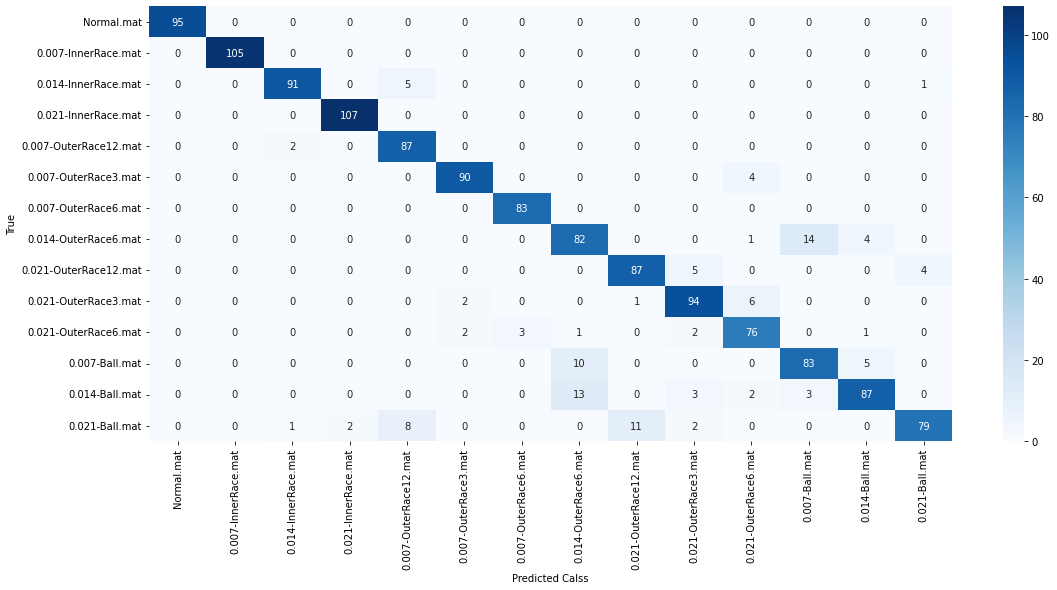

In [ ]:
test_predictions = clf_RF.predict(X_val)
test_confu_matrix = confusion_matrix(y_val, test_predictions)
fault_type = label
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.xlabel('Predicted Calss')
plt.ylabel('True Class')
plt.ylabel('True')
Accuracy = accuracy_score(y_val, test_predictions)
F1_score = f1_score(y_val, test_predictions, average='micro')
probs = clf_RF.predict_proba(X_val)
lr_auc = roc_auc_score(y_val, probs, multi_class='ovr')
# print("No. of Samples =", num_samples, "/  k =", num_levels, "/  m =", m, )
print('ROC AUC = %.3f' % (lr_auc))
print("F1 Score =", F1_score)
print("Accuracy = %.3f" % (Accuracy*100), "%")

ROC AUC = 0.996
F1 Score = 0.906891495601173
Accuracy = 90.689 %


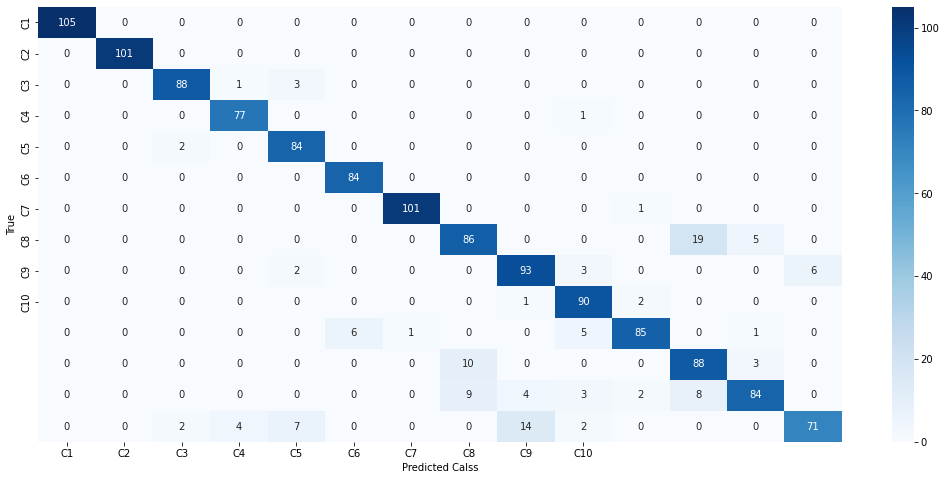

In [ ]:
test_predictions = clf_RF.predict(X_test)
test_confu_matrix = confusion_matrix(y_test, test_predictions)
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.xlabel('Predicted Calss')
plt.ylabel('True Class')
plt.ylabel('True')
Accuracy = accuracy_score(y_test, test_predictions)
F1_score = f1_score(y_test, test_predictions, average='micro')
probs = clf_RF.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, probs, multi_class='ovr')
# print("No. of Samples =", num_samples, "/  k =", num_levels, "/  m =", m, )
print('ROC AUC = %.3f' % (lr_auc))
print("F1 Score =", F1_score)
print("Accuracy = %.3f" % (Accuracy*100), "%")

In [ ]:
X_validasi=dat_2.drop(['Unnamed: 0','0.1'],axis=1)

In [ ]:
X_validasi_scaled=standard.transform(X_validasi)

In [ ]:
y_validasi=dat_2['0.1'].replace({
    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.007-OuterRace12.mat' : 4,
    '0.007-OuterRace3.mat' : 5,
    '0.007-OuterRace6.mat' : 6,
    '0.014-OuterRace6.mat' : 7,
    '0.021-OuterRace12.mat' : 8,
    '0.021-OuterRace3.mat' : 9,
    '0.021-OuterRace6.mat' : 10,
    '0.007-Ball.mat': 11,
    '0.014-Ball.mat' : 12,
    '0.021-Ball.mat' : 13,
})

In [ ]:
y_validasi=y_validasi.values

In [ ]:
dat_2.groupby('0.1')['0.1'].count()

0.1
0.007-Ball.mat           487
0.007-InnerRace.mat      486
0.007-OuterRace12.mat    484
0.007-OuterRace3.mat     486
0.007-OuterRace6.mat     487
0.014-Ball.mat           487
0.014-InnerRace.mat      487
0.014-OuterRace6.mat     487
0.021-Ball.mat           487
0.021-InnerRace.mat      487
0.021-OuterRace12.mat    487
0.021-OuterRace3.mat     487
0.021-OuterRace6.mat     487
Normal.mat               968
Name: 0.1, dtype: int64

ROC AUC = 0.983
F1 Score = 0.801480669043049
Accuracy = 80.148 %


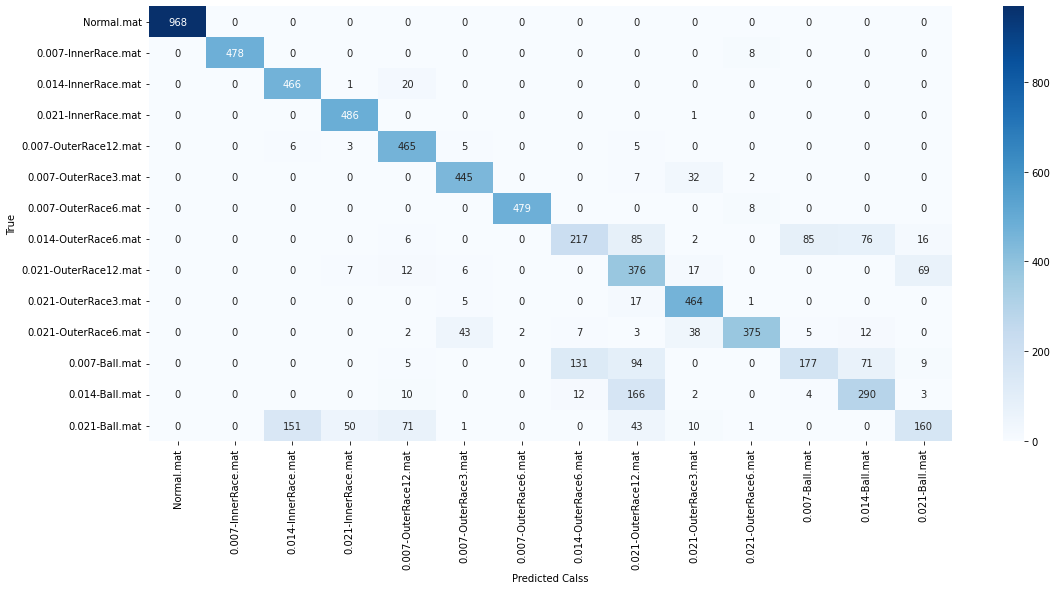

In [ ]:
test_predictions = clf_RF.predict(X_validasi_scaled)
test_confu_matrix = confusion_matrix(y_validasi, test_predictions)
fault_type = label
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.xlabel('Predicted Calss')
plt.ylabel('True Class')
plt.ylabel('True')
Accuracy = accuracy_score(y_validasi, test_predictions)
F1_score = f1_score(y_validasi, test_predictions, average='micro')
probs = clf_RF.predict_proba(X_validasi_scaled)
lr_auc = roc_auc_score(y_validasi, probs, multi_class='ovr')
# print("No. of Samples =", num_samples, "/  k =", num_levels, "/  m =", m, )
print('ROC AUC = %.3f' % (lr_auc))
print("F1 Score =", F1_score)
print("Accuracy = %.3f" % (Accuracy*100), "%")

In [ ]:
if(Accuracy<0.8):
  new_data= np.concatenate([X_scaled,X_validasi],axis=0)
  new_label=np.concatenate([y,y_validasi],axis=0)
  clf_RF.fit(new_data,new_label)

In [ ]:
new_data.shape

(14114, 32)

In [ ]:
clf_RF.fit(X_validasi_scaled,y_validasi)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestClassifier(max_depth=20, max_features=1, min_samples_split=3,
                       n_estimators=300, warm_start=True)

In [ ]:
X_validasi_2=dat_3.drop(['Unnamed: 0','0.1'],axis=1)
X_validasi_scaled_2=standard.transform(X_validasi_2)
y_validasi_2=dat_3['0.1'].replace({
    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.007-OuterRace12.mat' : 4,
    '0.007-OuterRace3.mat' : 5,
    '0.007-OuterRace6.mat' : 6,
    '0.014-OuterRace6.mat' : 7,
    '0.021-OuterRace12.mat' : 8,
    '0.021-OuterRace3.mat' : 9,
    '0.021-OuterRace6.mat' : 10,
    '0.007-Ball.mat': 11,
    '0.014-Ball.mat' : 12,
    '0.021-Ball.mat' : 13,
})
y_validasi_2=y_validasi_2.values

ROC AUC = 0.948
F1 Score = 0.6114839671886652
Accuracy = 61.148 %


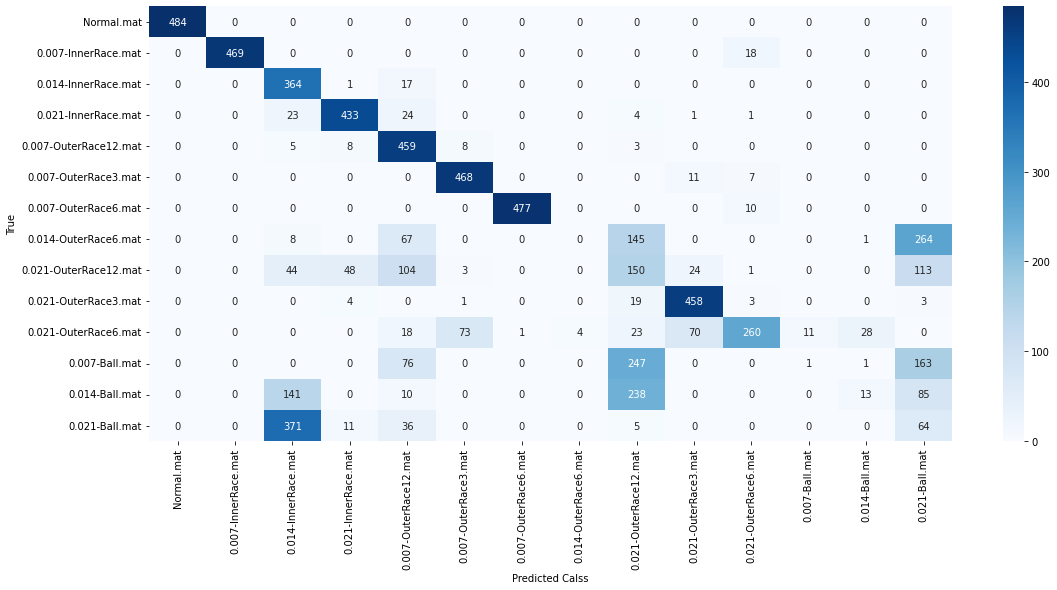

In [ ]:
test_predictions = clf_RF.predict(X_validasi_scaled_2)
test_confu_matrix = confusion_matrix(y_validasi_2, test_predictions)
fault_type = label
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.xlabel('Predicted Calss')
plt.ylabel('True Class')
plt.ylabel('True')
Accuracy = accuracy_score(y_validasi_2, test_predictions)
F1_score = f1_score(y_validasi_2, test_predictions, average='micro')
probs = clf_RF.predict_proba(X_validasi_scaled_2)
lr_auc = roc_auc_score(y_validasi_2, probs, multi_class='ovr')
# print("No. of Samples =", num_samples, "/  k =", num_levels, "/  m =", m, )
print('ROC AUC = %.3f' % (lr_auc))
print("F1 Score =", F1_score)
print("Accuracy = %.3f" % (Accuracy*100), "%")

In [ ]:
clf_RF.fit(X_validasi_scaled_2,y_validasi_2)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestClassifier(max_depth=20, max_features=1, min_samples_split=3,
                       n_estimators=300, warm_start=True)

In [ ]:
X_validasi_3=dat_4.drop(['Unnamed: 0','0.1'],axis=1)
X_validasi_scaled_3=standard.transform(X_validasi_3)
y_validasi_3=dat_4['0.1'].replace({
    'Normal.mat' : 0,
    '0.007-InnerRace.mat' : 1,
    '0.014-InnerRace.mat' : 2,
    '0.021-InnerRace.mat' : 3,
    '0.007-OuterRace12.mat' : 4,
    '0.007-OuterRace3.mat' : 5,
    '0.007-OuterRace6.mat' : 6,
    '0.014-OuterRace6.mat' : 7,
    '0.021-OuterRace12.mat' : 8,
    '0.021-OuterRace3.mat' : 9,
    '0.021-OuterRace6.mat' : 10,
    '0.007-Ball.mat': 11,
    '0.014-Ball.mat' : 12,
    '0.021-Ball.mat' : 13,
})
y_validasi_3=y_validasi_3.values

ROC AUC = 0.882
F1 Score = 0.37410071942446044
Accuracy = 37.410 %


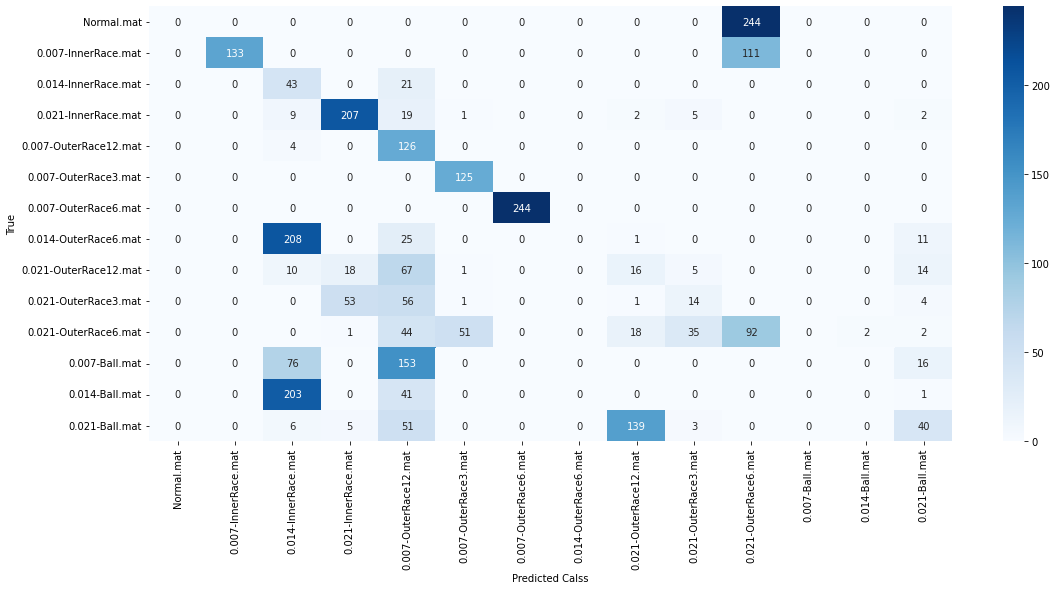

In [ ]:
test_predictions = clf_RF.predict(X_validasi_scaled_3)
test_confu_matrix = confusion_matrix(y_validasi_3, test_predictions)
fault_type = label
plt.figure(1,figsize=(18,8))
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.xlabel('Predicted Calss')
plt.ylabel('True Class')
plt.ylabel('True')
Accuracy = accuracy_score(y_validasi_3, test_predictions)
F1_score = f1_score(y_validasi_3, test_predictions, average='micro')
probs = clf_RF.predict_proba(X_validasi_scaled_3)
lr_auc = roc_auc_score(y_validasi_3, probs, multi_class='ovr')
print('ROC AUC = %.3f' % (lr_auc))
print("F1 Score =", F1_score)
print("Accuracy = %.3f" % (Accuracy*100), "%")

### Clustering

#### Model 1

In [ ]:
import torch
import torch.nn as nn

class TemporalClusteringNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, code_dim, num_layers=1, bidirectional=False):
        super().__init__()
        # encoder layers
        self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers, bidirectional=bidirectional)
        self.code_layer = nn.Linear(hidden_dim*2 if bidirectional else hidden_dim, code_dim)
        # decoder layers
        self.decoder = nn.LSTM(code_dim, hidden_dim, num_layers, bidirectional=bidirectional)
        self.output_layer = nn.Linear(hidden_dim*2 if bidirectional else hidden_dim, input_dim)
        
    def forward(self, x):
        # pass input through encoder to get code
        _, (h_n, _) = self.encoder(x)  # h_n shape (num_layers * num_directions, batch, hidden_size)
        h_n = h_n.view(h_n.size(0), -1)
        code = self.code_layer(h_n)
        # pass code through decoder to get reconstruction
        decoder_out, _ = self.decoder(code.unsqueeze(0))
        reconstruction = self.output_layer(decoder_out.squeeze(0))
        return reconstruction, code.squeeze(0)



In [ ]:
# define model, loss function, and optimizer
input_dim = len(time_series_data[0])
hidden_dim = 128
code_dim = 32
model = TemporalClusteringNetwork(input_dim, hidden_dim, code_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# train the model
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    reconstruction, code = model(time_series_data)
    # calculate loss
    loss = criterion(reconstruction, time_series_data)
    # backward pass

#### Model 2

In [ ]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, code_dim):
        super().__init__()
        # encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, code_dim)
        )
        # decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(code_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )
    
    def forward(self, x):
        # pass input through encoder to get code
        code = self.encoder(x)
        # pass code through decoder to get reconstruction
        reconstruction = self.decoder(code)
        return reconstruction

In [ ]:
# define model, loss function, and optimizer
input_dim = len(vibration_data[0])
hidden_dim = 128
code_dim = 32
model = Autoencoder(input_dim, hidden_dim, code_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# train the model
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    reconstruction = model(vibration_data)
    # calculate loss
    loss = criterion(reconstruction, vibration_data)
    # backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}, loss {loss.item():.4f}')

### Model 3

In [ ]:
ims_scaled

array([[-0.64499145, -0.51208689, -0.23363654, ..., -0.58993759,
        -1.70708963, -0.58250186],
       [-0.64427849, -0.51133964, -0.27518563, ..., -0.43941902,
        -2.91948068, -0.44956985],
       [-0.6430638 , -0.51123099, -0.22518739, ...,  0.09331887,
         1.93008351,  0.1117581 ],
       ...,
       [-0.64824796, -0.51645431, -0.54636523, ..., -1.58422116,
        -0.89882894, -1.52778995],
       [-0.64824792, -0.51645433, -0.54636546, ..., -1.58383073,
         4.75899595, -1.5270885 ],
       [-0.64824802, -0.51645452, -0.54637161, ..., -1.58164549,
         3.56664442, -1.52499601]])

In [ ]:
concated_data = np.concatenate([X_scaled,X_validasi_scaled],axis=0)
concated_label = np.concatenate([y,y_validasi],axis=0)

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)

In [ ]:
pcaed=pca.fit_transform(ims_scaled)

In [ ]:
pcaed

array([[-4.38609037, -0.15079855, -2.43252325],
       [-5.20590025,  2.86071878, -3.47843383],
       [-4.55072298,  1.27390403,  1.27982308],
       ...,
       [-7.23378318,  0.0107082 , -0.45640317],
       [-7.25585217,  0.36463298,  4.70057195],
       [-7.32193613,  0.66272789,  3.286608  ]])

In [ ]:
def kmean(data):
  from sklearn.cluster import KMeans
  temp=[]

  for i in range(12):
    km = KMeans(n_clusters=8)
    pred = km.fit_predict(data)

    # Get cluster assignments for each data point
    labels = km.labels_

    # Get cluster centers
    cluster_centers = km.cluster_centers_
    score=silhouette_score(data,pred)
    temp.append(score)
    print(score)
  
  res = max(temp)

  res = temp.index(res)

  return pred,res

In [ ]:
pred,res=kmean(pcaed)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.373531941900232


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.37167449653548384


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3735554563295172


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.37235607285254785


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.37166346006726


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3699980529117831


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.37348261493635854


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3734874531697825


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3728817755184937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3735062765191422


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3735462641320436


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.37178092347886393


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7)
pred = km.fit_predict(pcaed)

# Get cluster assignments for each data point
labels = km.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
new_data=pd.concat([pd.DataFrame(pcaed),
                    pd.DataFrame(labels)],axis=1)

In [ ]:
new_data.columns=np.arange(len(new_data.columns))

In [ ]:
new_data.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [ ]:
new_data=new_data.reset_index()

In [ ]:
new_data.loc[new_data[3]==0].index

Int64Index([    2,     5,    23,    28,    30,    31,    33,    37,    41,
               42,
            ...
            20646, 20648, 20649, 20650, 20655, 20656, 20657, 20660, 20662,
            20663],
           dtype='int64', length=4663)

In [ ]:
new_data.groupby([3])[['index',3]].describe()

index                                                                   \
    count          mean          std      min       25%      50%       75%   
3                                                                            
0  4663.0   7426.019730  4806.414756      2.0   3415.00   6905.0  10716.00   
1   126.0  20521.722222    72.708364  20317.0  20479.25  20532.5  20587.75   
2    41.0  20526.243902    40.436234  20475.0  20487.00  20509.0  20567.00   
3  3179.0  17702.885184  1792.412648  14721.0  15553.50  18080.0  19219.50   
4   215.0  20298.809302   219.621118  19625.0  20289.50  20345.0  20418.50   
5  3663.0  15122.558832  2273.643775    120.0  13429.50  14455.0  16927.50   
6  8777.0   6767.645437  4162.795575      0.0   3333.00   6636.0   9797.00   

                 3                                     
       max   count mean  std  min  25%  50%  75%  max  
3                                                      
0  20663.0  4663.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  20620.0   126.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2  20578.0    41.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
3  20390.0  3179.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
4  20621.0   215.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
5  19970.0  3663.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0  
6  20661.0  8777.0  6.0  0.0  6.0  6.0  6.0  6.0  6.0

In [ ]:
new_data.loc[new_data[3]==6].index

Int64Index([    0,     1,     3,     4,     6,     7,     8,     9,    10,
               11,
            ...
            20642, 20644, 20647, 20651, 20652, 20653, 20654, 20658, 20659,
            20661],
           dtype='int64', length=8777)

## Testing

## Cek Akurasi

# Clustering (Relabelling)

# Retraining